In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values = 'na')

df.head(n=5)

Levantamento do percentual de clientes inadimplentes

In [ ]:
qtd_total, _=df.shape
qtd_adimplentes, _= df[df['default'] == 0].shape
qtd_inadimplentes, _= df[df['default'] == 1].shape

print(f'Adimplentes: {round(100 * qtd_adimplentes/qtd_total, 2)}%')
print(f'Inadimplentes: {round(100 * qtd_inadimplentes/qtd_total, 2)}%')
print(f'Total de clientes: {qtd_total}')

De 10127 clientes na base, 16% estão inadimplentes

In [ ]:
#Verifica se as colunas possuem dados faltantes
df.isna().any()

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _=df[df[col].isna()].shape
      total, _=df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100*qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

Correção e Limpeza dos dados

In [ ]:
#transformando de str para float
fn = lambda valor: float(valor.replace('.','').replace(',','.'))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

In [ ]:
#aplica a função lambda a coluna toda (êxito)
df['valor_transacoes_12m']=df['valor_transacoes_12m'].apply(fn)
df['limite_credito']=df['limite_credito'].apply(fn)

Remoção dados faltantes

In [ ]:
df.dropna(inplace=True)

Visualização

In [ ]:
sns.set_style('whitegrid')

In [ ]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

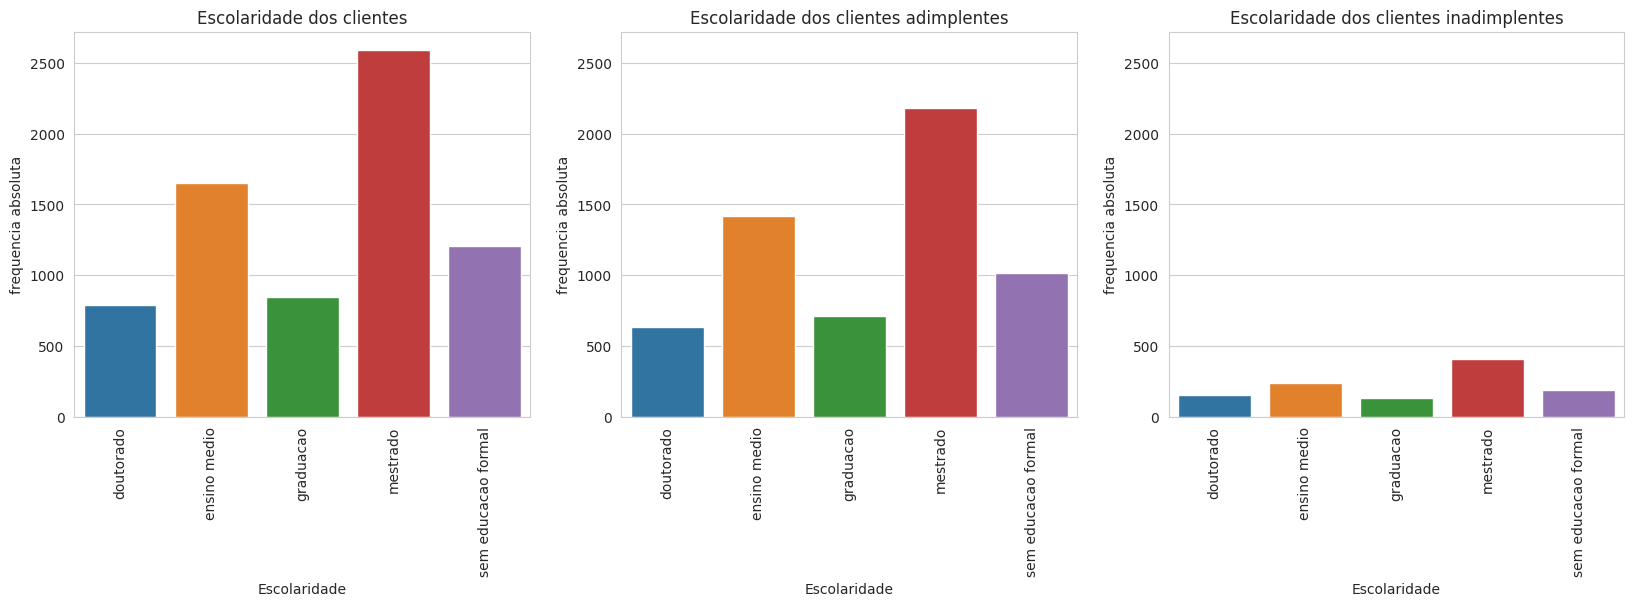

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos clientes', 'Escolaridade dos clientes adimplentes', 'Escolaridade dos clientes inadimplentes']

eixo = 0
max_y = 0

max = df.select_dtypes('object').describe()[coluna]['freq']*1.1
figura, eixos = plt.subplots(1,3, figsize = (20, 5), sharex = True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia absoluta'}, inplace = True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='frequencia absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f=f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()